In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os 
from process import *
from scanorama import *

/home/mohsen/.local/lib/python3.6/site-packages/scikit_learn-0.21.3-py3.6-linux-x86_64.egg/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
def load_data(paths, studies, pre_process=False, merge=False):
    if pre_process:
        process(paths, min_trans=100)
        
    datasets, genes_list, n_cells_list = load_names(paths, norm=False, log1p=False)
    
    if merge:
        datasets, genes_list = merge_datasets(datasets, genes_list, ds_names=paths)
        
    i = 0
    for dataset, gene_names, study in zip(datasets, genes_list, studies):
        adata = sc.AnnData(X=dataset)
        adata.var_names = gene_names
        adata.obs['study'] = study
        if i == 0:
            adata_all = adata.copy()
        else:
            adata_all = adata_all.concatenate(adata)
        i += 1
    return adata_all

# Read Pancreas datasets

In [4]:
data_path = "data/panorama/scanorama/data/"

In [5]:
pancreas_paths = [
    'data/panorama/pancreas/pancreas_inDrop',
    'data/panorama/pancreas/pancreas_multi_celseq2_expression_matrix',
    'data/panorama/pancreas/pancreas_multi_celseq_expression_matrix',
    'data/panorama/pancreas/pancreas_multi_fluidigmc1_expression_matrix',
    'data/panorama/pancreas/pancreas_multi_smartseq2_expression_matrix',
]
pancreas_studies = [
    'Pancreas inDrop',
    'Pancreas CelSeq2',
    'Pancreas Celseq',
    'Pancreas Fluidigm C1',
    'Pancreas SS2',
]

In [6]:
pancreas_cell_labels = (
        open('data/panorama/cell_labels/pancreas_cluster.txt')
        .read().rstrip().split()
    )
len(pancreas_cell_labels)

15921

In [7]:
pancreas_adata = load_data(pancreas_paths, pancreas_studies)
pancreas_adata.obs['cell_type'] = pancreas_cell_labels
pancreas_adata

Loaded data/panorama/pancreas/pancreas_inDrop with 20126 genes and 8569 cells
Loaded data/panorama/pancreas/pancreas_multi_celseq2_expression_matrix with 19140 genes and 2449 cells
Loaded data/panorama/pancreas/pancreas_multi_celseq_expression_matrix with 20148 genes and 1276 cells
Loaded data/panorama/pancreas/pancreas_multi_fluidigmc1_expression_matrix with 25463 genes and 638 cells
Loaded data/panorama/pancreas/pancreas_multi_smartseq2_expression_matrix with 26179 genes and 2989 cells
Found 15921 cells among all datasets


AnnData object with n_obs × n_vars = 15921 × 15369 
    obs: 'batch', 'study', 'cell_type'

In [8]:
pancreas_adata.X.min(), pancreas_adata.X.max()

(0.0, 1453667.0)

In [9]:
pancreas_adata.obs['cell_type'] = pancreas_adata.obs['cell_type'].replace("beta", "Pancreas Beta")
pancreas_adata.obs['cell_type'] = pancreas_adata.obs['cell_type'].replace("alpha", "Pancreas Alpha")
pancreas_adata.obs['cell_type'] = pancreas_adata.obs['cell_type'].replace("ductal", "Pancreas Ductal")
pancreas_adata.obs['cell_type'] = pancreas_adata.obs['cell_type'].replace("delta", "Pancreas Delta")
pancreas_adata.obs['cell_type'] = pancreas_adata.obs['cell_type'].replace("endo", "Pancreas Endothelial")
pancreas_adata.obs['cell_type'] = pancreas_adata.obs['cell_type'].replace("acinar", "Pancreas Acinar")
pancreas_adata.obs['cell_type'] = pancreas_adata.obs['cell_type'].replace("gamma", "Pancreas Gamma")
pancreas_adata.obs['cell_type'] = pancreas_adata.obs['cell_type'].replace("stellate", "Pancreas Stellate")
pancreas_adata.obs['cell_type'] = pancreas_adata.obs['cell_type'].replace("beta_er", "Pancreas Beta(ER stress)")
pancreas_adata.obs['cell_type'] = pancreas_adata.obs['cell_type'].replace("other", "Pancreas Unkonwn")

In [10]:
pancreas_adata.obs['cell_type'].value_counts()

Pancreas Beta               4765
Pancreas Alpha              4704
Pancreas Ductal             2104
Pancreas Delta              1041
Pancreas Endothelial         836
Pancreas Acinar              713
Pancreas Gamma               637
Pancreas Stellate            561
Pancreas Beta(ER stress)     320
Pancreas Unkonwn             240
Name: cell_type, dtype: int64

In [11]:
pancreas_adata.write_h5ad("./data/pancreas/pancreas_count.h5ad")

... storing 'study' as categorical
... storing 'cell_type' as categorical


In [13]:
pancreas_adata_normalized = pancreas_adata.copy()

In [14]:
sc.pp.normalize_per_cell(pancreas_adata_normalized)
sc.pp.log1p(pancreas_adata_normalized)

In [15]:
pancreas_adata_normalized.X.min(), pancreas_adata_normalized.X.max()

(0.0, 8.5599375)

In [16]:
pancreas_adata_normalized.write_h5ad("./data/pancreas/pancreas_normalized.h5ad")

# Read PBMC Datasets

In [339]:
pbmc_paths = [
    'data/panorama/pbmc/10x/68k_pbmc',
    'data/panorama/pbmc/10x/b_cells',
    'data/panorama/pbmc/10x/cd14_monocytes',
    'data/panorama/pbmc/10x/cd4_t_helper',
    'data/panorama/pbmc/10x/cd56_nk',
    'data/panorama/pbmc/10x/cytotoxic_t',
    'data/panorama/pbmc/10x/memory_t',
    'data/panorama/pbmc/10x/regulatory_t',
    'data/panorama/pbmc/pbmc_kang',
    'data/panorama/pbmc/pbmc_10X',
]
pbmc_studies = [
    'PBMC 68K',
    'B Cells',
    'CD14 Monocytes',
    'CD4 T Helper',
    'CD56 NK',
    'Cytotoxic T Cells',
    'Memory T Cells',
    'Regulatory T Cells',
    'PBMC Kang',
    'PBMC 10X',
]

In [340]:
pbmc_cell_labels = (
    open('data/panorama/cell_labels/pbmc_cluster.txt')
    .read().rstrip().split()
)

In [341]:
pbmc_adata = load_data(pbmc_paths, pbmc_studies)
pbmc_adata.obs['cell_type'] = pbmc_cell_labels
pbmc_adata

Loaded data/panorama/pbmc/10x/68k_pbmc with 32738 genes and 18018 cells
Loaded data/panorama/pbmc/10x/b_cells with 32738 genes and 2261 cells
Loaded data/panorama/pbmc/10x/cd14_monocytes with 32738 genes and 295 cells
Loaded data/panorama/pbmc/10x/cd4_t_helper with 32738 genes and 3713 cells
Loaded data/panorama/pbmc/10x/cd56_nk with 32738 genes and 6657 cells
Loaded data/panorama/pbmc/10x/cytotoxic_t with 32738 genes and 3990 cells
Loaded data/panorama/pbmc/10x/memory_t with 32738 genes and 3628 cells
Loaded data/panorama/pbmc/10x/regulatory_t with 32738 genes and 3365 cells
Loaded data/panorama/pbmc/pbmc_kang with 35635 genes and 3774 cells


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.


Loaded data/panorama/pbmc/pbmc_10X with 32738 genes and 2293 cells
Found 47994 cells among all datasets


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variab

AnnData object with n_obs × n_vars = 47994 × 32643 
    obs: 'batch', 'study', 'cell_type'

In [342]:
pbmc_adata.obs['cell_type'].value_counts()

T       18006
TCD4    10706
NK       6978
M        4905
TCD8     3990
B        3397
U          12
Name: cell_type, dtype: int64

In [343]:
pbmc_adata.obs['cell_type'] = pbmc_adata.obs['cell_type'].replace("T", "PBMC T cells")
pbmc_adata.obs['cell_type'] = pbmc_adata.obs['cell_type'].replace("TCD4", "PBMC CD4 T cells")
pbmc_adata.obs['cell_type'] = pbmc_adata.obs['cell_type'].replace("NK", "PBMC CD56+ NK")
pbmc_adata.obs['cell_type'] = pbmc_adata.obs['cell_type'].replace("M", "PBMC CD14+ monocyte")
pbmc_adata.obs['cell_type'] = pbmc_adata.obs['cell_type'].replace("TCD8", "PBMC CD8 T cells")
pbmc_adata.obs['cell_type'] = pbmc_adata.obs['cell_type'].replace("B", "PBMC CD19+ B cells")
pbmc_adata.obs['cell_type'] = pbmc_adata.obs['cell_type'].replace("U", "PBMC Unknown")

In [344]:
pbmc_adata = pbmc_adata.copy()[pbmc_adata.obs['cell_type'] != 'PBMC Unknown']
pbmc_adata

View of AnnData object with n_obs × n_vars = 47982 × 32643 
    obs: 'batch', 'study', 'cell_type'

In [345]:
pbmc_adata.X.min(), pbmc_adata.X.max()

(0.0, 2489.0)

# Read Macrophage datasets

In [245]:
macrophage_paths = [
                    'data/panorama/macrophage/uninfected',
                    'data/panorama/macrophage/uninfected_donor2',
                    'data/panorama/macrophage/infected',
                    'data/panorama/macrophage/mixed_infected',
                   ]
macrophage_studies = [
    'Macrophage Uninfected',
    'Macrophage Uninfected2',
    'Macrophage Infected',
    'Macrophage Mixed'
]

In [246]:
macrophage_adata = load_data(macrophage_paths, macrophage_studies, pre_process=True)
macrophage_adata

Successfully processed data/panorama/macrophage/uninfected
Successfully processed data/panorama/macrophage/uninfected_donor2
Successfully processed data/panorama/macrophage/infected
Successfully processed data/panorama/macrophage/mixed_infected
Loaded data/panorama/macrophage/uninfected with 15580 genes and 18130 cells
Loaded data/panorama/macrophage/uninfected_donor2 with 14429 genes and 698 cells
Loaded data/panorama/macrophage/infected with 20385 genes and 11989 cells


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.


Loaded data/panorama/macrophage/mixed_infected with 20060 genes and 2174 cells
Found 32991 cells among all datasets


AnnData object with n_obs × n_vars = 32991 × 11743 
    obs: 'batch', 'study'

In [327]:
macrophage_adata.obs['cell_type'] = 'Macrophage'

In [328]:
macrophage_adata.X.min(), macrophage_adata.X.max()

(0.0, 2312.0)

# Read hsc datasets

In [247]:
hsc_paths = [
    'data/panorama/hsc/hsc_mars',
    'data/panorama/hsc/hsc_ss2',
]
hsc_studies = [
    'HSC Mars',
    'HSC SS2',
]

In [248]:
hsc_cell_labels = (
    open('data/panorama/cell_labels/hsc_cluster.txt')
    .read().rstrip().split()
)

In [249]:
hsc_adata = load_data(hsc_paths, hsc_studies)
hsc_adata.obs['cell_type'] = hsc_cell_labels
hsc_adata

Loaded data/panorama/hsc/hsc_mars with 8716 genes and 2401 cells
Loaded data/panorama/hsc/hsc_ss2 with 39109 genes and 774 cells
Found 3175 cells among all datasets


AnnData object with n_obs × n_vars = 3175 × 6843 
    obs: 'batch', 'study', 'cell_type'

In [347]:
hsc_adata.obs['cell_type'] = hsc_adata.obs['cell_type'].replace("MEP", 'Hsc MEP')
hsc_adata.obs['cell_type'] = hsc_adata.obs['cell_type'].replace("GMP", 'Hsc GMP')
hsc_adata.obs['cell_type'] = hsc_adata.obs['cell_type'].replace("CMP", 'Hsc CMP')
hsc_adata.obs['cell_type'] = hsc_adata.obs['cell_type'].replace("U", 'Hsc Unknown')

In [348]:
hsc_adata.obs['cell_type'].value_counts()

Hsc MEP        1394
Hsc GMP        1183
Hsc CMP         590
Hsc Unknown       8
Name: cell_type, dtype: int64

In [349]:
hsc_adata.X.min(), hsc_adata.X.max()

(0.0, 208540.0)

# Read 293t_jurkat datasets

In [311]:
jurkat_paths = [
    'data/panorama/293t_jurkat/293t',
    'data/panorama/293t_jurkat/jurkat',
    'data/panorama/293t_jurkat/jurkat_293t_50_50',
    'data/panorama/293t_jurkat/jurkat_293t_99_1'
]
jurkat_studies = [
    '293t',
    'Jurkat',
    'Jurkat 293t 50:50',
    'Jurkat 293t 99:1'
]

In [365]:
jurkat_cell_labels = (
    open('data/panorama/cell_labels/293t_jurkat_cluster.txt')
    .read().rstrip().split()
)
jurkat_cell_labels = jurkat_cell_labels + ['jurkat'] * 4185 # Will be changed after reading all datasets
len(jurkat_cell_labels)

13715

In [367]:
jurkat_adata = load_data(jurkat_paths, jurkat_studies)
jurkat_adata.obs['cell_type'] = jurkat_cell_labels
jurkat_adata

Loaded data/panorama/293t_jurkat/293t with 32738 genes and 2885 cells
Loaded data/panorama/293t_jurkat/jurkat with 32738 genes and 3257 cells
Loaded data/panorama/293t_jurkat/jurkat_293t_50_50 with 32738 genes and 3388 cells
Loaded data/panorama/293t_jurkat/jurkat_293t_99_1 with 32738 genes and 4185 cells
Found 13715 cells among all datasets


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.


AnnData object with n_obs × n_vars = 13715 × 32738 
    obs: 'batch', 'study', 'cell_type'

In [370]:
jurkat_adata.obs['cell_type'] = jurkat_adata.obs['cell_type'].replace("jurkat", "Jurkat")

In [371]:
jurkat_adata.obs['cell_type'].value_counts()

Jurkat    9225
293t      4490
Name: cell_type, dtype: int64

# Read Brain dataset

In [321]:
brain_paths = [
    'data/panorama/brain/neuron_9k'
]
brain_studies = [
    'Neuron9K'
]

In [323]:
brain_adata = load_data(brain_paths, brain_studies)
brain_adata.obs['cell_type'] = 'Neuron'
brain_adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Loaded data/panorama/brain/neuron_9k with 27998 genes and 9032 cells
Found 9032 cells among all datasets


AnnData object with n_obs × n_vars = 9032 × 27998 
    obs: 'study', 'cell_type'

# Read Mouse Brain dataset

In [3]:
mouse_brains_paths = [
    'data/panorama/mouse_brain/nuclei',
    'data/panorama/mouse_brain/dropviz/Cerebellum_ALT',
    'data/panorama/mouse_brain/dropviz/Cortex_noRep5_FRONTALonly',
    'data/panorama/mouse_brain/dropviz/Cortex_noRep5_POSTERIORonly',
    'data/panorama/mouse_brain/dropviz/EntoPeduncular',
    'data/panorama/mouse_brain/dropviz/GlobusPallidus',
    'data/panorama/mouse_brain/dropviz/Hippocampus',
    'data/panorama/mouse_brain/dropviz/Striatum',
    'data/panorama/mouse_brain/dropviz/SubstantiaNigra',
    'data/panorama/mouse_brain/dropviz/Thalamus',
]
mouse_brain_studies = [
    mouse_brains_paths[i].split("/")[-1] for i in range(len(mouse_brains_paths))
]

In [ ]:
mouse_brain_adata = load_data(mouse_brains_paths, mouse_brain_studies, pre_process=True)
mouse_brain_adata

Successfully processed data/panorama/mouse_brain/nuclei
Successfully processed data/panorama/mouse_brain/dropviz/Cerebellum_ALT
Successfully processed data/panorama/mouse_brain/dropviz/Cortex_noRep5_FRONTALonly
Successfully processed data/panorama/mouse_brain/dropviz/Cortex_noRep5_POSTERIORonly
Successfully processed data/panorama/mouse_brain/dropviz/EntoPeduncular
Successfully processed data/panorama/mouse_brain/dropviz/GlobusPallidus
Successfully processed data/panorama/mouse_brain/dropviz/Hippocampus
Successfully processed data/panorama/mouse_brain/dropviz/Striatum
Successfully processed data/panorama/mouse_brain/dropviz/SubstantiaNigra
Successfully processed data/panorama/mouse_brain/dropviz/Thalamus
Loaded data/panorama/mouse_brain/nuclei with 26894 genes and 156049 cells
Loaded data/panorama/mouse_brain/dropviz/Cerebellum_ALT with 24247 genes and 76250 cells
Loaded data/panorama/mouse_brain/dropviz/Cortex_noRep5_FRONTALonly with 29463 genes and 194019 cells
Loaded data/panorama/m

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controll

# Integrate All datasets

In [374]:
adata = jurkat_adata.concatenate(brain_adata, hsc_adata, macrophage_adata, pancreas_adata, pbmc_adata)
adata

AnnData object with n_obs × n_vars = 122816 × 5216 
    obs: 'batch', 'cell_type', 'study'

In [378]:
adata.obs['cell_type'].value_counts()

Macrophage                  32991
PBMC T cells                18006
PBMC CD4 T cells            10706
Jurkat                       9225
Neuron                       9032
PBMC CD56+ NK                6978
PBMC CD14+ monocyte          4905
Pancreas Beta                4765
Pancreas Alpha               4704
293t                         4490
PBMC CD8 T cells             3990
PBMC CD19+ B cells           3397
Pancreas Ductal              2104
Hsc MEP                      1394
Hsc GMP                      1183
Pancreas Delta               1041
Pancreas Endothelial          836
Pancreas Acinar               713
Pancreas Gamma                637
Hsc CMP                       590
Pancreas Stellate             561
Pancreas Beta(ER stress)      320
Pancreas Unkonwn              240
Hsc Unknown                     8
Name: cell_type, dtype: int64

In [380]:
adata.obs['study'].value_counts()

Macrophage Uninfected     18130
PBMC 68K                  18006
Macrophage Infected       11989
Neuron9K                   9032
Pancreas inDrop            8569
CD56 NK                    6657
Jurkat 293t 99:1           4185
Cytotoxic T Cells          3990
PBMC Kang                  3774
CD4 T Helper               3713
Memory T Cells             3628
Jurkat 293t 50:50          3388
Regulatory T Cells         3365
Jurkat                     3257
Pancreas SS2               2989
293t                       2885
Pancreas CelSeq2           2449
HSC Mars                   2401
PBMC 10X                   2293
B Cells                    2261
Macrophage Mixed           2174
Pancreas Celseq            1276
HSC SS2                     774
Macrophage Uninfected2      698
Pancreas Fluidigm C1        638
CD14 Monocytes              295
Name: study, dtype: int64

In [381]:
adata.X.min(), adata.X.max()

(0.0, 246419.0)

In [382]:
adata.write_h5ad("./data/panorama/panorama.h5ad")

... storing 'cell_type' as categorical
... storing 'study' as categorical


In [403]:
adata_normalized = adata.copy()
adata_count = adata.copy()

In [404]:
sc.pp.normalize_per_cell(adata_normalized)
sc.pp.log1p(adata_normalized)

In [405]:
sc.pp.highly_variable_genes(adata_normalized, n_top_genes=2000)

In [406]:
hvg_list = adata_normalized.var['highly_variable']

In [407]:
adata_normalized = adata_normalized[:, hvg_list]
adata_normalized

View of AnnData object with n_obs × n_vars = 122816 × 2000 
    obs: 'batch', 'cell_type', 'study', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [408]:
adata_count = adata_count[:, hvg_list]
adata_count

View of AnnData object with n_obs × n_vars = 122816 × 2000 
    obs: 'batch', 'cell_type', 'study'

In [409]:
adata_normalized.X.min(), adata_normalized.X.max()

(0.0, 6.834304)

In [410]:
adata_count.X.min(), adata_count.X.max()

(0.0, 246419.0)

In [411]:
adata_normalized.write_h5ad("./data/panorama/panorama_normalized.h5ad")
adata_count.write_h5ad("./data/panorama/panorama_count.h5ad")

# UMAP Visualization of Integrated dataset

In [412]:
sc.pp.neighbors(adata_normalized)
sc.tl.umap(adata_normalized)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [413]:
sc.settings.set_figure_params(dpi=200)

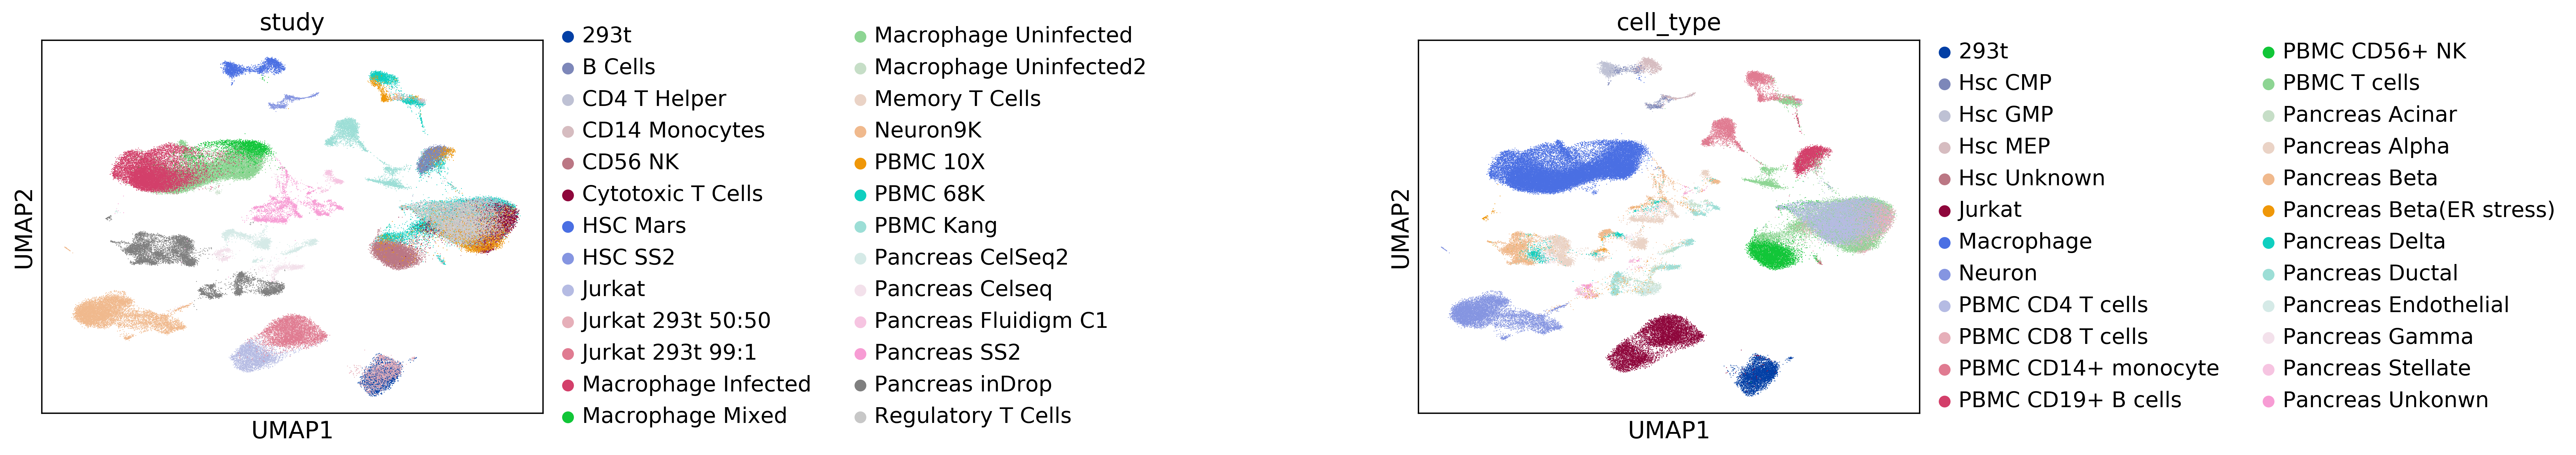

In [415]:
sc.pl.umap(adata_normalized, color=['study', 'cell_type'], wspace=1.5)